# Crime Classification

From 1934 to 1963, San Francisco was infamous for housing some of the
world's most notorious criminals on the inescapable island of Alcatraz.
Today, the city is known more for its tech scene than its criminal past. But,
with rising wealth inequality, housing shortages, and a proliferation of
expensive digital toys riding BART to work, there is no scarcity of crime in
the city by the bay.

# Data Exploration
In this section, We will load data and see its content.

## 1. Loading the data files

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.basemap import Basemap
import datetime
from matplotlib import gridspec
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, fbeta_score
from time import time
import random

In [2]:
# load train and test as dataframes
train_data = pd.read_csv("E:\\PyProblems\\MachineLearning\\machine-learning-master\\projects\\crime-classification\\train.csv")
test_data = pd.read_csv("E:\\PyProblems\\MachineLearning\\machine-learning-master\\projects\\crime-classification\\test.csv")

## 2. Showing data

In [5]:
display(train_data.head(n=10))
print("Training data has {} points with {} variables each".format(*train_data.shape))
display(test_data.head(n=10))
print("Testing data has {} points with {} variables each".format(*test_data.shape))

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


Training data has 878049 points with 9 variables each


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


Testing data has 884262 points with 7 variables each


Note that, training data will be divided into training and cross-validation to test the models.

----
# Data visualizing and preprocessing
Here, we'll visualize data and remove unnecessary or redundant data.

## 1. Removing redundant features
`Descript` & `Resolution` don't exist in the testing set, nor they're labels to be predicted. So, it's beter to drop them.

In [3]:
#Dropping redundant features
train_data = train_data.drop(['Descript', 'Resolution'], axis=1)
train_data.head(n=10)

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


## 2. Location Description
Now, let's visualize location information.

In [4]:
# lets see the statistics summary of locations
longitudes = train_data['X'] 
latitudes = train_data['Y']

print("Longitudes:")
print(longitudes.describe())
print()
print("Latitudes:")
print(latitudes.describe())

Longitudes:
count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

Latitudes:
count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64


---
**Observation:**
* longitudes are between [-122.51, -120.5]
* latitudes are between [37.709, 90]
* as shown in the statistics that the most values are close to 37.7
* From google maps, San Francisco longitudes are between [-122.517652, -122.3275], and latitudes are between [37.707, 37.83269]

Now, to demonstrate the locations, let's plot them using scatter plot

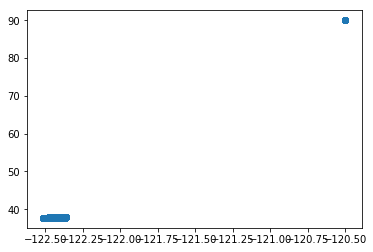

In [0]:
plt.scatter(longitudes, latitudes)
plt.show()

### Removing redundant locations

In [5]:
# Removing invalid locations
train_data.drop(train_data[((train_data['X'] > -122.3275) | (train_data['X'] < -122.517652))].index, inplace=True)
train_data.drop(train_data[((train_data['Y'] > 37.83269) | (train_data['Y'] < 37.707))].index, inplace=True)

In [6]:
longitudes = train_data['X'] 
latitudes = train_data['Y']

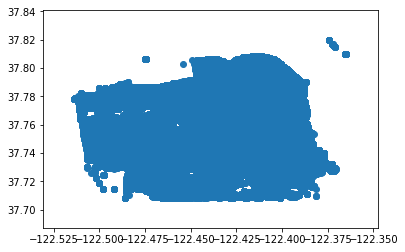

In [9]:
#lngitudes vs. latitudes
plt.scatter(longitudes, latitudes)
plt.show()

## 3. Visualize according to locations

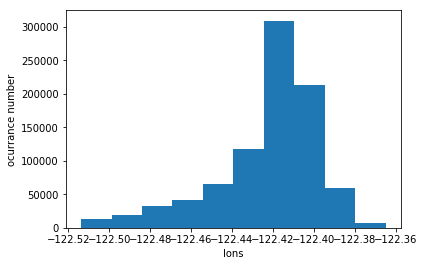

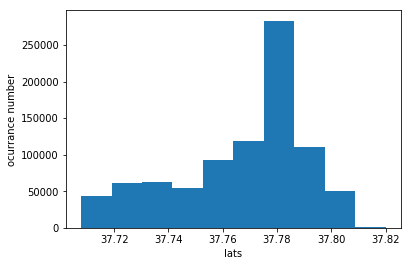

In [0]:
# histogram plot for lons and lats
plt.hist(longitudes)
plt.xlabel('lons')
plt.ylabel('ocurrance number')
plt.show()

plt.hist(latitudes)
plt.xlabel('lats')
plt.ylabel('ocurrance number')
plt.show()

---
**Observation:**  the most crimes are in the location of longitude = [-122.44, -122.40] and latitude = [37.76, 37.80]

---
Finding number of occurances of for each category in data

In [7]:
def getCategoriesOccurrences():    
    categories = train_data['Category']
    occurrences = Counter(categories)
    sort_occ = sorted(occurrences.items(), key=lambda pair: pair[1], reverse=True)
    return sort_occ        
sort_occ = getCategoriesOccurrences()
for (key, value) in sort_occ:
        print(key, value)

LARCENY/THEFT 174885
OTHER OFFENSES 126165
NON-CRIMINAL 92300
ASSAULT 76872
DRUG/NARCOTIC 53971
VEHICLE THEFT 53772
VANDALISM 44724
WARRANTS 42206
BURGLARY 36754
SUSPICIOUS OCC 31412
MISSING PERSON 25989
ROBBERY 22999
FRAUD 16679
FORGERY/COUNTERFEITING 10609
SECONDARY CODES 9985
WEAPON LAWS 8555
PROSTITUTION 7484
TRESPASS 7325
STOLEN PROPERTY 4539
SEX OFFENSES FORCIBLE 4387
DISORDERLY CONDUCT 4318
DRUNKENNESS 4280
RECOVERED VEHICLE 3138
KIDNAPPING 2341
DRIVING UNDER THE INFLUENCE 2268
RUNAWAY 1946
LIQUOR LAWS 1903
ARSON 1513
LOITERING 1225
EMBEZZLEMENT 1166
SUICIDE 508
FAMILY OFFENSES 491
BAD CHECKS 406
BRIBERY 289
EXTORTION 256
SEX OFFENSES NON FORCIBLE 148
GAMBLING 146
PORNOGRAPHY/OBSCENE MAT 22
TREA 6


---
**Observation:**
The most committed crime in San Francisco is the LARCENY/THEFT. The least committed crime in San Francisco is TREA.

----
Now, let's plot  the data on map using basemap library from mpl_toolkits.

In [8]:
# minimum and maximum longitude and latitude
lon_min = min(longitudes) 
lon_max = max(longitudes) 
lat_min = min(latitudes) 
lat_max = max(latitudes)

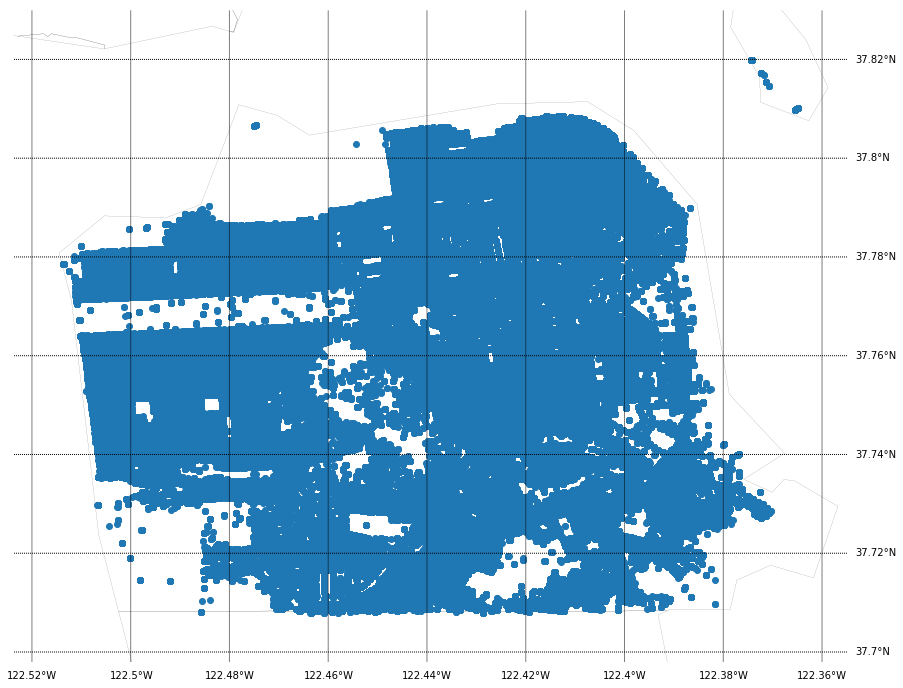

In [0]:
fig = plt.figure(figsize=(24,12)) # to make plot bigger
fig.add_subplot(111, frame_on=False)

# Adding 0.01 to the map width and height
map = Basemap(
    llcrnrlon=lon_min-0.01,
    llcrnrlat=lat_min-0.01,
    urcrnrlon=lon_max+0.01,
    urcrnrlat=lat_max+0.01
)

parallels = np.arange(37,38,0.02)
meridians = np.arange(-122.6,-122.3,.02)
map.drawcounties()
map.drawparallels(parallels,labels=[False,True,True,False])
map.drawmeridians(meridians,labels=[True,False,False,True])
map.scatter(longitudes, latitudes)

plt.show()

In [9]:
data = train_data.groupby(['X', 'Y']).size().reset_index(name='occurrences')
data = data[data.occurrences < 500]

Contour plot by Basemap

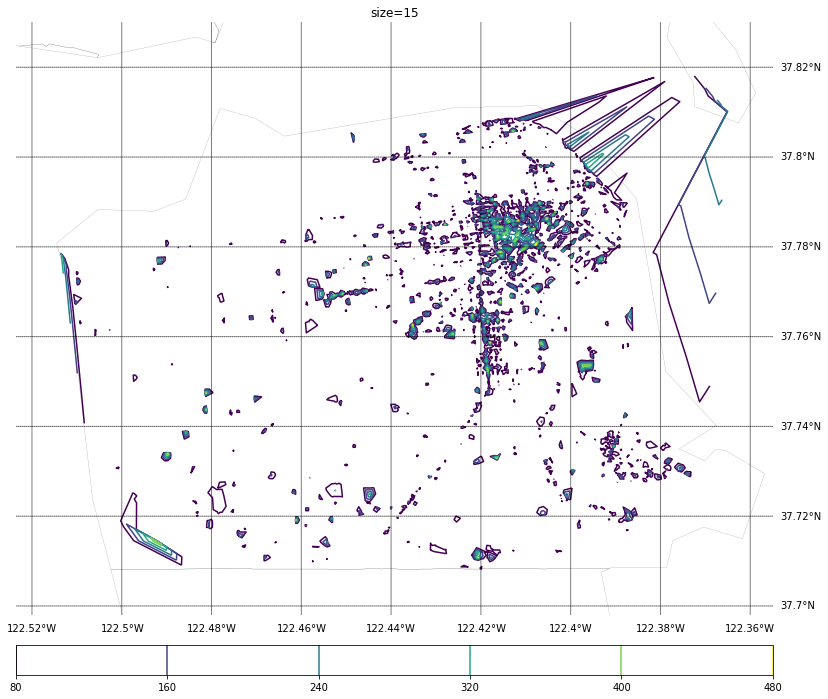

In [0]:
fig = plt.figure(figsize=(24,12)) # to make plot bigger
fig.add_subplot(111, frame_on=False)

# Adding 0.01 to the map width and height
map = Basemap(
    llcrnrlon=lon_min-0.01,
    llcrnrlat=lat_min-0.01,
    urcrnrlon=lon_max+0.01,
    urcrnrlat=lat_max+0.01
)

parallels = np.arange(37,38,0.02)
meridians = np.arange(-122.6,-122.3,.02)
map.drawcounties()
map.drawparallels(parallels,labels=[False,True,True,False])
map.drawmeridians(meridians,labels=[True,False,False,True])
# map.scatter(new_lons, new_lats)
x = data.X.as_matrix()
y = data.Y.as_matrix()
z = data.occurrences.as_matrix()
mymap= map.contour(x, y, z, tri=True)
map.colorbar(mymap,location='bottom',pad="5%")
plt.title("size="+str(15))
plt.show()

There's no information enough from above plots. So, let's plot the crime categories in descending order, where the most committed crime first.

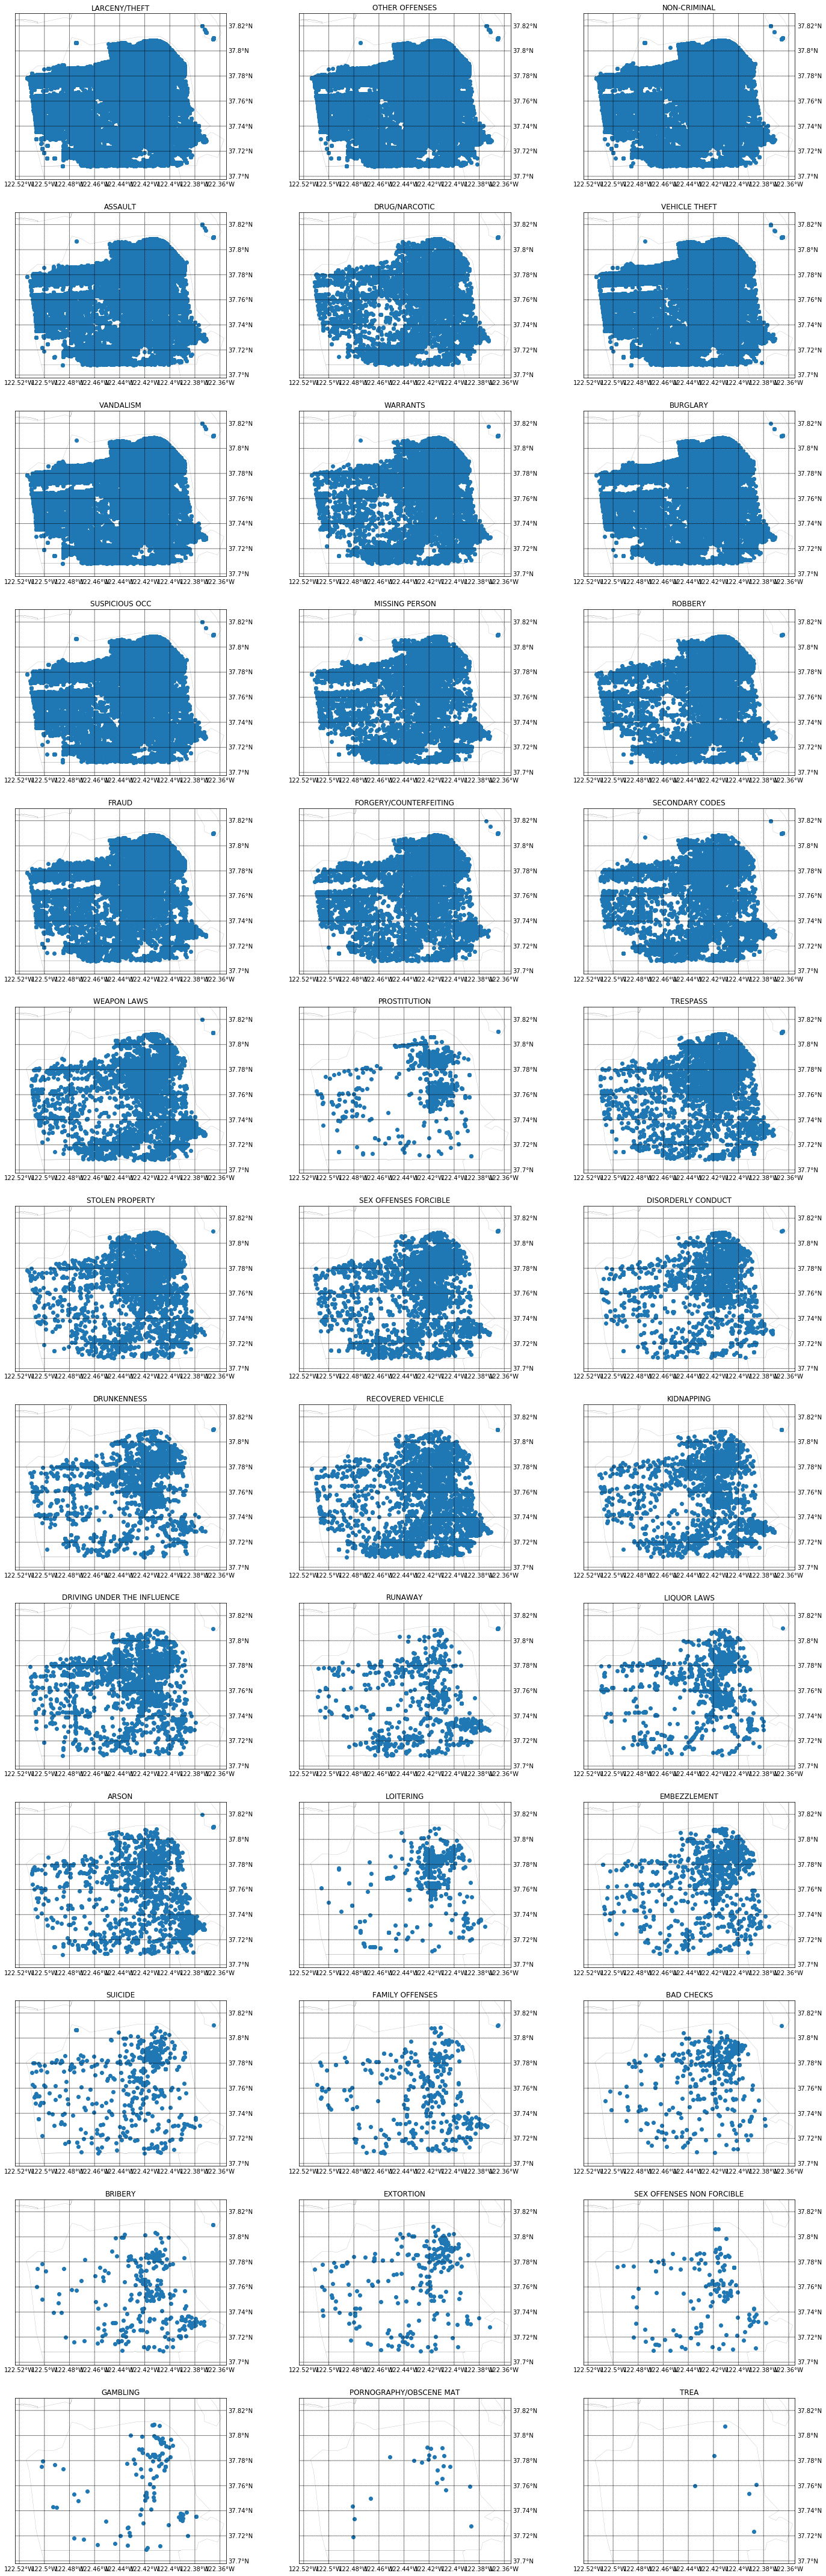

In [0]:
plt.subplots(figsize=(24, 78))
i = 0 # subplot number

grid = gridspec.GridSpec(13,3)
for pair in sort_occ[:]:
    ax = plt.subplot(grid[i])
    map = Basemap(
        llcrnrlon=lon_min-0.01,
        llcrnrlat=lat_min-0.01,
        urcrnrlon=lon_max+0.01,
        urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    category_data = train_data[train_data['Category'] == pair[0]]
    
    lons = category_data['X']
    lats = category_data['Y']
    map.scatter(lons, lats)
    plt.title(pair[0]) # pair[0] = category name
    i+=1

plt.show()

---
**Observation:** The maps above show that some crimes occur on certain locations, for example `prostitution` occurs mostly in (37.79N, -122.41W) and (37.76N, -122.41W). Other crimes spread all over the map like `Driving under the influence`.

## 4. Visualize according to time
Visualizing each category in order of time. We'll do that for the most common crime only -i.e. `LARCENY/THEFT`- as example in order to find a pattern according to time.

First, according to each month

In [ ]:
plt.subplots(figsize=(12, 36))
# The most commited crime
category = sort_occ[0][0]
category_data = train_data[train_data['Category'] == category]
columns = ['Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
result = {}
# Adding a dataframe for each month
for i in range(0, 12):
    result[i] = pd.DataFrame(columns=columns)
grid = gridspec.GridSpec(6,2)
for index, row in category_data.iterrows():
    u = datetime.datetime.strptime(row['Dates'], "%Y-%m-%d %H:%M:%S")
    month = int(u.strftime("%m"))
    row = row.transpose()
    result[month-1] = result[month-1].append(row)
    category_data.drop(index)

C:\Users\lenovo pc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


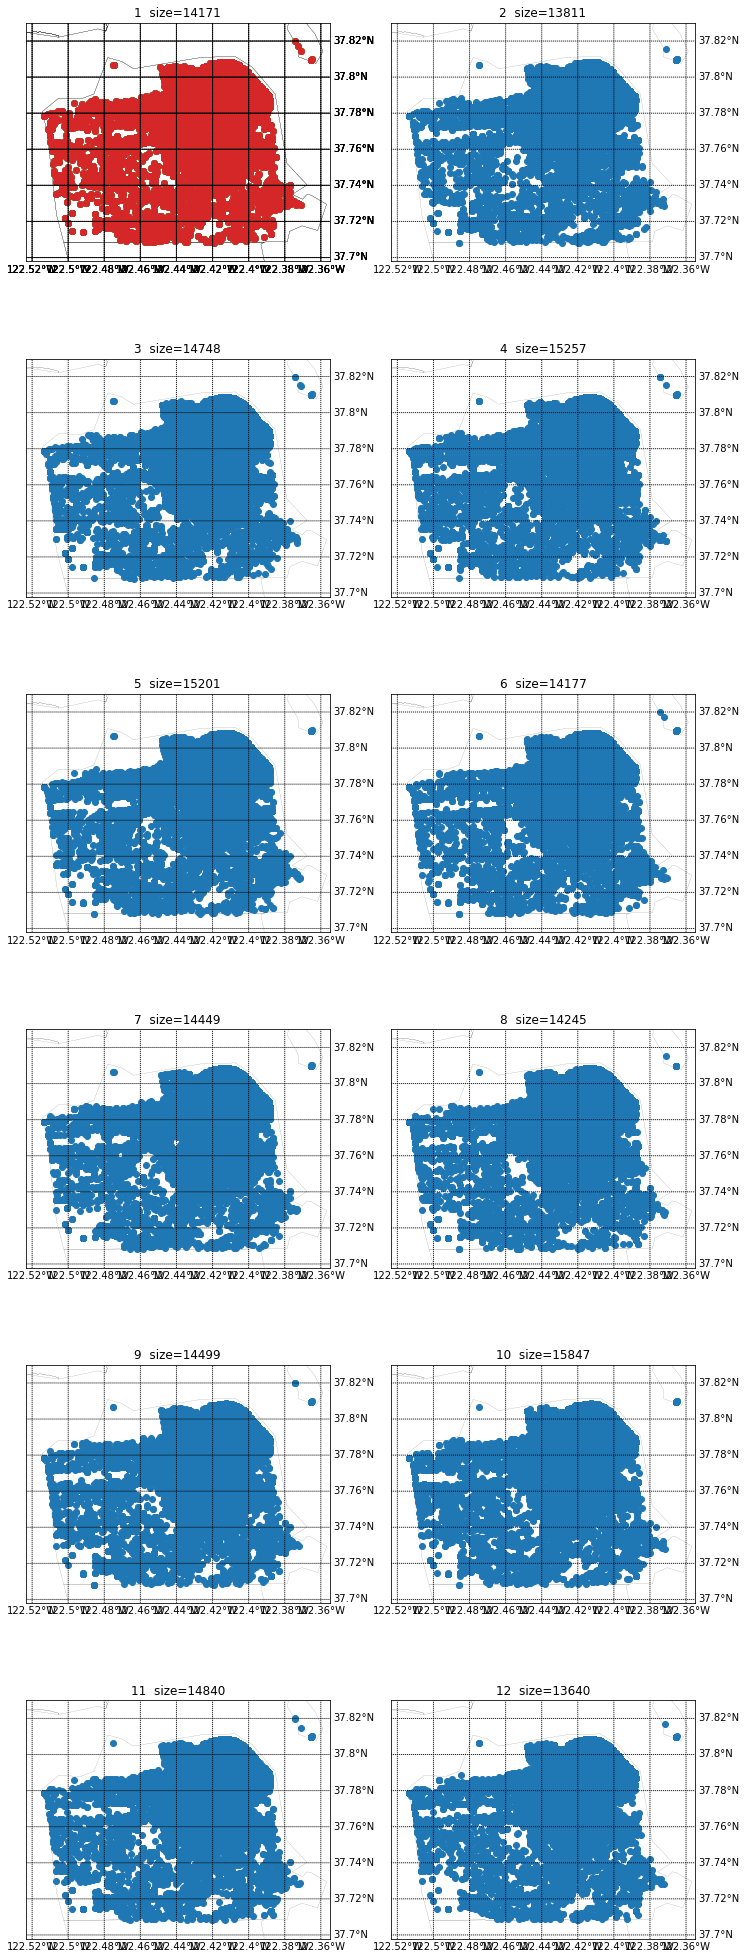

In [15]:
for i in range(0, 12):
    ax = plt.subplot(grid[i])
    map = Basemap(
      llcrnrlon=lon_min-0.01,
      llcrnrlat=lat_min-0.01,
      urcrnrlon=lon_max+0.01,
      urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    lons = result[i]['X']
    lats = result[i]['Y']
    map.scatter(lons, lats)
    plt.title(str(i+1) + "  size=" + str(len(result[i])))
plt.show()

according to days of week

0
1
2
3
4
5
6


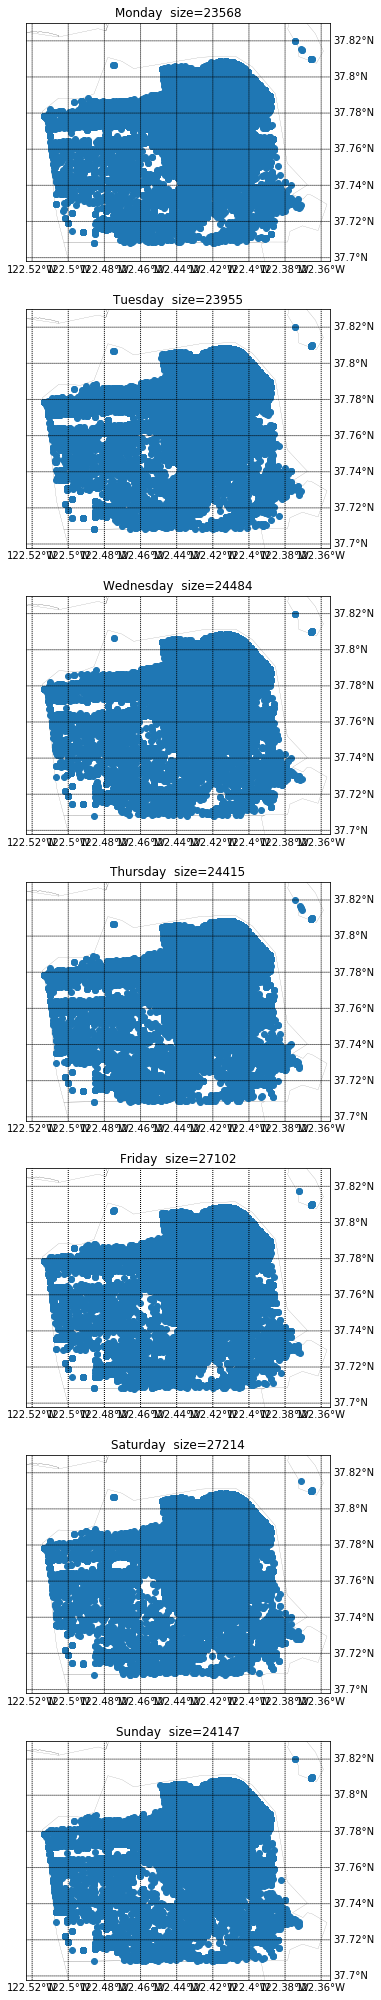

In [0]:
plt.subplots(figsize=(12, 36))
i = 0 # subplot number

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# The most commited crime
category = sort_occ[0][0]
category_data = train_data[train_data['Category'] == category]

grid = gridspec.GridSpec(7,1)
for day in days:
    ax = plt.subplot(grid[i])
    map = Basemap(
        llcrnrlon=lon_min-0.01,
        llcrnrlat=lat_min-0.01,
        urcrnrlon=lon_max+0.01,
        urcrnrlat=lat_max+0.01
    )
    parallels = np.arange(37,38,0.02)
    meridians = np.arange(-122.6,-122.3,.02)
    map.drawcounties()
    map.drawparallels(parallels,labels=[False,True,True,False])
    map.drawmeridians(meridians,labels=[True,False,False,True])
    day_data = category_data[category_data['DayOfWeek'] == day]
    lons = day_data['X']
    lats = day_data['Y']
    map.scatter(lons, lats)
    plt.title(day + "  size=" + str(len(day_data)))
    print(i)
    i+=1

plt.show()

**Observation:** As shown in plots above, the pattern of the crimes is likely to be equi-distributed on months and days of week. Some months like `April` and `May` have higher crime rate than others like `December` and `Junauary`. That's probably because of weather changes.
Also days that before the weekend are more than other days a little.

## 5. Data preprocessing

### Data Encoding

In [10]:
# spliting train data into target and other features
target = train_data['Category']
data = train_data.drop(['Category'], axis=1)

4 features from the data given are categorical features, what makes us be to convert them into numeric values to train the models on them. These features are:
* Dates
* DayOfWeek
* PdDistrict
* Address

We can use label Encoding and 1-hot encoding. One-Hot encoding produces more dimensions, but it's better than label encoding is that the last assumes that there's an order between the values.

So let's use one-hot encoding with the features with a small number of unique values and use the label encoding with the features with the others.


In [11]:
for f in ['Dates', 'DayOfWeek', 'PdDistrict', 'Address']:
    print("feature: {}    unique_size: {}".format(f ,len(data[f].unique())))

feature: Dates    unique_size: 389229
feature: DayOfWeek    unique_size: 7
feature: PdDistrict    unique_size: 10
feature: Address    unique_size: 23191


As shown above, `DayOfWeek` and `PdDistrict` can one-hot encoded. But `Address`, `Dates` should be encoded using label encoding.

For `Dates`, minutes and seconds are not regarded to have no effect on out prediction. so let's transform `Dates` then convert `Address` using `cat.codes` tool.

### 5.1 Label Encoding

In [12]:
# truncates seconds and minutes from the input list of dates
def truncateTime(dates):
    result = []
    for date in dates:
        result.append(date[:-6])
    return result

# truncate minutes and seconds from dates
data['Dates'] = truncateTime(data['Dates'])

# label encoding
data['Dates'] = data['Dates'].astype('category')
data['Dates_int'] = data['Dates'].cat.codes

# label encoding
data['Address'] = data['Address'].astype('category')
data['Address_int'] = data['Address'].cat.codes

data.head(n=10)

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_int,Address_int
0,2015-05-13 23,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53629,19762
1,2015-05-13 23,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53629,19762
2,2015-05-13 23,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,53629,22661
3,2015-05-13 23,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,53629,4266
4,2015-05-13 23,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,53629,1843
5,2015-05-13 23,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431,53629,1505
6,2015-05-13 23,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,53629,13313
7,2015-05-13 23,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,53629,18028
8,2015-05-13 23,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,53629,11378
9,2015-05-13 23,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,53629,17634


Now, `Dates` and `Address` columns are useless.

In [13]:
# Dropping useless features
data = data.drop(['Dates', 'Address'], axis=1)
data.head(n=10)

,DayOfWeek,PdDistrict,X,Y,Dates_int,Address_int
0,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762
1,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762
2,Wednesday,NORTHERN,-122.424363,37.800414,53629,22661
3,Wednesday,NORTHERN,-122.426995,37.800873,53629,4266
4,Wednesday,PARK,-122.438738,37.771541,53629,1843
5,Wednesday,INGLESIDE,-122.403252,37.713431,53629,1505
6,Wednesday,INGLESIDE,-122.423327,37.725138,53629,13313
7,Wednesday,BAYVIEW,-122.371274,37.727564,53629,18028
8,Wednesday,RICHMOND,-122.508194,37.776601,53629,11378
9,Wednesday,CENTRAL,-122.419088,37.807802,53629,17634


### 5.2 One-Hot Encoding
Now, let's encode the `DayOfWeek` and `PdDistrict` in One-Hot encoding way

In [14]:
# get dummies for each feature
dummies1 = pd.get_dummies(data['DayOfWeek'])
dummies2 = pd.get_dummies(data['PdDistrict'])
# join dummies to the original dataframe
data = data.join(dummies1)
data = data.join(dummies2)

data.head(n=10)

,DayOfWeek,PdDistrict,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Wednesday,NORTHERN,-122.425892,37.774599,53629,19762,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Wednesday,NORTHERN,-122.424363,37.800414,53629,22661,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wednesday,NORTHERN,-122.426995,37.800873,53629,4266,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Wednesday,PARK,-122.438738,37.771541,53629,1843,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Wednesday,INGLESIDE,-122.403252,37.713431,53629,1505,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,Wednesday,INGLESIDE,-122.423327,37.725138,53629,13313,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,Wednesday,BAYVIEW,-122.371274,37.727564,53629,18028,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,Wednesday,RICHMOND,-122.508194,37.776601,53629,11378,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,Wednesday,CENTRAL,-122.419088,37.807802,53629,17634,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Now, `DayOfWeek` and `PdDistrict` columns are useless.

In [15]:
data = data.drop(['DayOfWeek', 'PdDistrict'], axis=1)
print("data size =",len(data))
data.head(n=10)

data size = 877982


,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.425892,37.774599,53629,19762,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,53629,19762,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,53629,22661,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,53629,4266,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,53629,1843,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,-122.403252,37.713431,53629,1505,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,-122.423327,37.725138,53629,13313,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,-122.371274,37.727564,53629,18028,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,-122.508194,37.776601,53629,11378,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,-122.419088,37.807802,53629,17634,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


---
**Observation:** Now, the training data are ready to be used for our models with 21 dimensions and 877982 samples.

## 5. Data splitting

In [16]:
#Split the training set into training and validation sets
X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size=0.2, random_state=0, stratify=target)
print("train size: {}, test size: {}".format(X_train.shape[0], X_test.shape[0]))

train size: 702385, test size: 175597



--------------
# Models Implementation

We are going to implement various models and train them on our data and compare their performances using multi-class logarithmic loss.

## 1. Implementing Models
Here, we'll train different models on training data.

### Training pipline
Now, we'll train different learners, so we'll generalize a function for training all the models. 

The function returns a result dictionary which contains the description of each model's result.

**Note:** We shouldn't use accuracy here as the data is imbalanced.

In [76]:
results = {}

In [18]:
def train_test_models(models, names=None):
    i = 0
    for model in models:
        if not names:
            model_name = model.__class__.__name__
        else:
            model_name = names[i]
            i += 1
        result = {}
    
        # training learner
        start = time()
        learner.fit(X_train, y_train)
        end = time()
        result['training_time'] = end - start

        # predict samples in training set
        predictions = learner.predict(X_train)
        prob = learner.predict_proba(X_train)

        # calculate fbeta and log loss
        result['fscore'] = fbeta_score(y_train, predictions, beta=.5, average='micro')
        result['logloss'] = log_loss(y_train, prob)

        # predict testing samples and time of prediction
        start = time()
        predictions = learner.predict(X_test)
        prob = learner.predict_proba(X_test)
        end = time()
        result['test_time'] = end - start

        # calculate fbeta and log loss for testing set
        result['fscore_test'] = fbeta_score(y_test, predictions, beta=.5, average='micro')
        result['logloss_test'] = log_loss(y_test, prob)


        print("{} trained".format(learner.__class__.__name__))
        results[model_name] = result

### Visualization
visualize training and testing results

In [82]:
def visualize(results, names=['random_model', 'DecisionTree', 'MLP_NN', 'XGBoost'], random=True):
    width = 0.4
    fig, ax = plt.subplots(6,1,figsize = (12,32))
    for j, metric in enumerate(['training_time', 'fscore', 'logloss', 'test_time', 'fscore_test', 'logloss_test']):
        ax[j].set_title(metric)
        ax[j].set_xlabel("Learners")
        ax[j].set_ylabel(metric)
        y = []
        for learner in results.keys():
            y.append(results[learner][metric])
        ax[j].bar(names, y, width=width)
    if random:
        # add horizontal dashed line for random model results
        random_results = results['random_model']
        ax[0].axhline(y=random_results['training_time'], linestyle='dashed')
        ax[1].axhline(y=random_results['fscore'], linestyle='dashed')
        ax[2].axhline(y=random_results['logloss'], linestyle='dashed')  
        ax[3].axhline(y=random_results['test_time'], linestyle='dashed')
        ax[4].axhline(y=random_results['fscore_test'], linestyle='dashed')
        ax[5].axhline(y=random_results['logloss_test'], linestyle='dashed')
    plt.show()

### 1.1 Naive Random Predictor
Random predictor which always predict the category randomly.

In [20]:
class random_model:
     
    #initialization
    def __init__(self, categories):
        self.categories = categories
        self.classes_ = categories
    
    # fit does anything
    def fit(self, X_train, y_train): pass
    
    # predict random category
    def predict(self, X):
        result = [[] for j in range(len(X))]
        for i in range(len(X)):
            result[i] = random.choice(self.categories)
        return result
        
    def predict_proba(self, X):
        result = [[] for j in range(len(X))]
        for i in range(len(X)):
            row = [0.0] * len(self.categories)
            prediction = random.choice(self.categories)
            for j in range(len(self.categories)): 
                if(self.categories[j] == prediction):
                    row[j] = 1.0
                    break
            result[i] = row
        return result

### 1.2 other models
In this section, We'll train other models using training pipline that we implemented previously. The models are:
* Decision Tree
* Neural network MLP
* Support vector machine
* XGBoost

#### 1.2.1 Initializing models
Here, we enhance imbalanced data more by putting the `class_weight` parameter = `balanced` which mean that the weights will be automatically adjusted inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier

# initializing models
model_tree = DecisionTreeClassifier(class_weight='balanced', random_state=0)
model_NN = MLPClassifier(solver='lbfgs', random_state=0)
model_SVC = SVC(probability=True, class_weight='balanced', random_state=0)
model_XGB = XGBClassifier(learning_rate=0.1, silent=True, random_state=0)

#### 1.2.2 get random model results

In [22]:
# get random model results
model_random = random_model(categories=target.unique())
train_test_models([model_random])

random_model trained


#### 1.2.3 train and visualize other models with small number of samples

In [23]:
#models = [model_tree, model_NN, model_SVC, model_XGB]
# Please, note that SVC took a huge amount of time, which hinders my proceeding with other sections, so it can be regarded as
# a refused model due to its very long training and testing time
models = [model_tree, model_NN, model_XGB]
train_test_models(models)

DecisionTreeClassifier trained
MLPClassifier trained
XGBClassifier trained


model: random_model
fscore:		0.025884664393459426
logloss:	33.660143086078286
train time:	0.0
fscore_test:		0.025831876398799525
logloss_test:	33.665457561483024
test time:	1.7655024528503418
model: DecisionTreeClassifier
fscore:		0.8647038305202986
logloss:	0.2834970560020728
train time:	23.467116594314575
fscore_test:		0.22556194012426184
logloss_test:	25.459928853705016
test time:	0.5624613761901855
model: MLPClassifier
fscore:		0.08523530542366364
logloss:	31.569749373878704
train time:	264.91698956489563
fscore_test:		0.0845344738235847
logloss_test:	31.588637996266044
test time:	2.249844551086426
model: XGBClassifier
fscore:		0.25906304946717257
logloss:	2.460570737321583
train time:	2692.1726791858673
fscore_test:		0.25872879377210317
logloss_test:	2.466384636960238
test time:	161.00923538208008


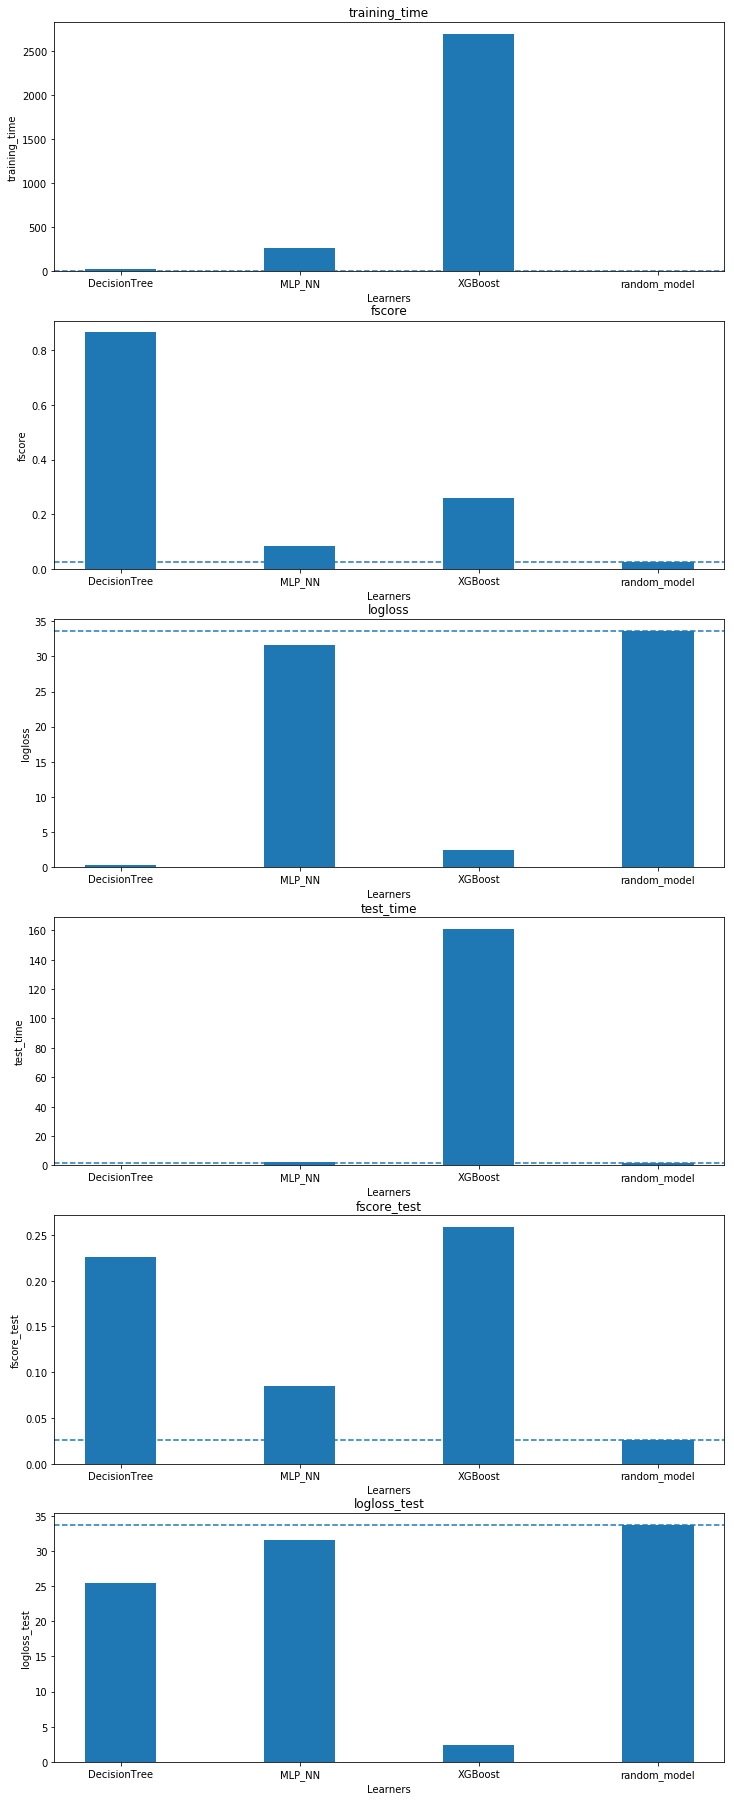

In [74]:
# print results
for model in results:
    model_res = results[model]
    print("model: {}".format(model))
    print("fscore:\t\t{}\nlogloss:\t{}\ntrain time:\t{}".format(model_res['fscore'], model_res['logloss'], model_res['training_time']))
    print("fscore_test:\t\t{}\nlogloss_test:\t{}\ntest time:\t{}".format(model_res['fscore_test'], model_res['logloss_test'], model_res['test_time']))

# visualize the results    
visualize(results)

**Observation:**

For training:
* SVC is the slowest model at all then XGBoost.
* All models are better than the random predictor.

For test data: 
* The best model in f1 score and logloss is XGBClassifier
* XGBoost is the slowest model.
    
It's obvious now that XGBoost classifier has the priority to consider as the main model for this problem, due to its testing fscore and logarithmic loss

---
## 2 . Model Refinement
Let's tune the XGBClassifier, so we can reach the best model.

In [78]:
model_XGB1 = XGBClassifier(learning_rate=0.01, silent=1, random_state=0, booster='gbtree', max_depth=3)
model_XGB2 = XGBClassifier(learning_rate=0.1, silent=1, random_state=0, booster='gbtree', max_depth=3)
model_XGB3 = XGBClassifier(learning_rate=0.3, silent=1, random_state=0, booster='gblinear')


models = [model_XGB1, model_XGB2,model_XGB3]
names = ["XGB1", "XGB2", "XGB3"]
train_test_models(models, names=names)

XGBClassifier trained
XGBClassifier trained
XGBClassifier trained


model: XGB1
fscore:		0.24516184144023576
logloss:	2.9185689671226935
train time:	2500.9239916801453
fscore_test:		0.24488459370034796
logloss_test:	2.9189853007350375
test time:	131.3761134147644
model: XGB2
fscore:		0.25906304946717257
logloss:	2.460570737321583
train time:	2562.8924474716187
fscore_test:		0.25872879377210317
logloss_test:	2.466384636960238
test time:	150.39454102516174
model: XGB3
fscore:		0.2033073029748642
logloss:	2.6449566668214017
train time:	2187.4725148677826
fscore_test:		0.20268000022779434
logloss_test:	2.645420300509561
test time:	1.0155749320983887


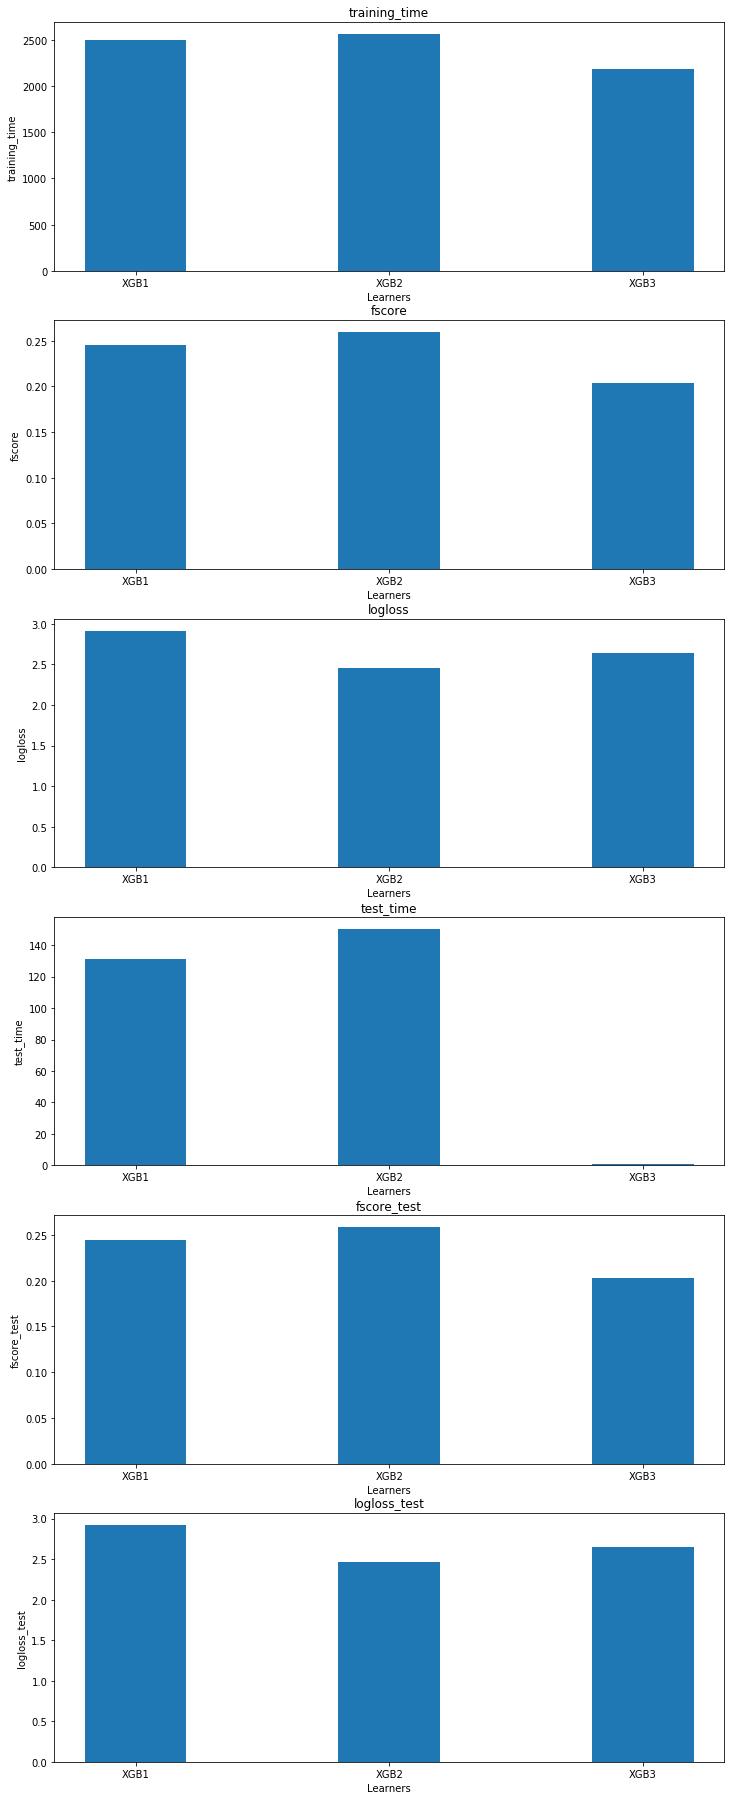

In [84]:
# print results
for model in results:
    model_res = results[model]
    print("model: {}".format(model))
    print("fscore:\t\t{}\nlogloss:\t{}\ntrain time:\t{}".format(model_res['fscore'], model_res['logloss'], model_res['training_time']))
    print("fscore_test:\t\t{}\nlogloss_test:\t{}\ntest time:\t{}".format(model_res['fscore_test'], model_res['logloss_test'], model_res['test_time']))

# visualize the results    
visualize(results, names, False)

---
**Observations:**
XGBoost Model 2 gives the best of both logloss and fscore on the test dataset.

## 3. Final results

### 3.1 Testing data preprocessing 

In [85]:
test_data.head(n=10)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


In [87]:
# encode Dates and Address
test_data['Dates'] = truncateTime(test_data['Dates'])
test_data['Dates'] = test_data['Dates'].astype('category')
test_data['Dates_int'] = test_data['Dates'].cat.codes
test_data['Address'] = test_data['Address'].astype('category')
test_data['Address_int'] = test_data['Address'].cat.codes
test_data.drop(['Dates', 'Address'], axis=1, inplace=True)

# encode DayOfWeek and PdDistrict
DayOfWeek_dummies = pd.get_dummies(test_data['DayOfWeek'])
PdDistrict_dummies = pd.get_dummies(test_data['PdDistrict'])
test_data = test_data.join(DayOfWeek_dummies)
test_data = test_data.join(PdDistrict_dummies)
test_data.drop(['DayOfWeek', 'PdDistrict'], axis=1, inplace=True)

# drop id column
test_data.drop(['Id'], axis=1, inplace=True)

test_data.head(n=10)

,X,Y,Dates_int,Address_int,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.399588,37.735051,54047,6407,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,54047,9744,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,54047,6336,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,54047,10633,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,54047,10633,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-122.459024,37.713172,54047,13799,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,-122.425616,37.739351,54047,1890,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,-122.412652,37.739750,54047,5611,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,-122.418700,37.765165,54047,8090,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,-122.413935,37.798886,54047,22053,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3.2 Predict results

In [94]:
results = model_XGB2.predict_proba(test_data)

In [95]:
results.shape

(884262, 39)

### 3.3 Put results into pandas dataframe

In [96]:
output_data = pd.DataFrame(data=results, columns=model_XGB2.classes_)

In [97]:
output_data.head(n=10)

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.002627,0.130347,0.000304,0.001213,0.044964,0.002544,0.003132,0.026719,0.002640,0.001447,...,0.000425,0.006508,0.000729,0.044759,0.000170,0.007776,0.112401,0.080739,0.040303,0.018038
1,0.002357,0.127046,0.000273,0.001651,0.037023,0.002585,0.002815,0.036716,0.005531,0.001300,...,0.000409,0.005776,0.000655,0.040942,0.000262,0.006872,0.115911,0.057355,0.058067,0.016333
2,0.002210,0.076778,0.000373,0.000371,0.103159,0.002051,0.001705,0.011130,0.003148,0.001645,...,0.000186,0.006795,0.000608,0.032047,0.000133,0.008871,0.090330,0.047099,0.017071,0.003725
3,0.002636,0.138040,0.000292,0.002470,0.042585,0.001983,0.003041,0.017331,0.003851,0.001014,...,0.000417,0.006821,0.000765,0.038411,0.000153,0.006132,0.129230,0.098473,0.029026,0.012825
4,0.002636,0.138040,0.000292,0.002470,0.042585,0.001983,0.003041,0.017331,0.003851,0.001014,...,0.000417,0.006821,0.000765,0.038411,0.000153,0.006132,0.129230,0.098473,0.029026,0.012825
5,0.001688,0.072575,0.000191,0.000811,0.002552,0.001431,0.010397,0.021725,0.004840,0.000279,...,0.000455,0.005715,0.000537,0.029606,0.000166,0.001461,0.086708,0.084905,0.036245,0.013136
6,0.002427,0.101604,0.000269,0.001009,0.062386,0.002096,0.001725,0.017253,0.003065,0.001115,...,0.000383,0.005800,0.000766,0.036652,0.000150,0.007290,0.106502,0.113551,0.023768,0.008953
7,0.002019,0.121890,0.000273,0.001027,0.035731,0.002522,0.002816,0.025117,0.003545,0.001135,...,0.000390,0.005851,0.000766,0.037285,0.000153,0.006883,0.102892,0.107004,0.036096,0.016136
8,0.002040,0.104755,0.000277,0.000536,0.031421,0.004155,0.003390,0.057342,0.007248,0.001151,...,0.000316,0.007401,0.000602,0.034404,0.000155,0.007211,0.101249,0.034579,0.064106,0.011509
9,0.000902,0.068655,0.000231,0.000246,0.002736,0.002487,0.005951,0.029291,0.012658,0.000273,...,0.000357,0.006404,0.001308,0.022501,0.000161,0.000951,0.108715,0.054812,0.031337,0.008427


**Produce the results into csv file: **

In [0]:
output_data.index.name = 'Id'
output_data.to_csv("E:\\PyProblems\\MachineLearning\\machine-learning-master\\projects\\crime-classification\\output_data.csv")